# The Holy Trilogies: Finding the Most Loved Star Film

### The Goal
For this project we'll explore a dataset collected from a survey of Star Wars fans.

### Background 
While waiting for [Star Wars: The Force Awakens](https://en.wikipedia.org/wiki/Star_Wars:_The_Force_Awakens) to come out, the team at [FiveThirtyEight](http://fivethirtyeight.com/) became interested in answering some questions about Star Wars fans. In particular, they wondered: **does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?**

### The Results

In short, we found that there's a general consensus that, indeed, "The Empire Strikes Back" is considered the best Star Wars film.

## The Data
The team needed to collect data addressing this question. To do this, they surveyed Star Wars fans using the online tool SurveyMonkey. They received 835 total responses, which can be downloaded from [their GitHub repository](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey).

In [500]:
# Boilerplate code that loads the libraries and data
import pandas as pd
import numpy as np
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

# Allow Jupyter notebook to generate plots
import matplotlib.pyplot as plt
%matplotlib inline

# Some information about the dataset
star_wars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 0 to 1185
Data columns (total 38 columns):
 #   Column                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                         --------------  -----  
 0   RespondentID                                                                                                                                   1186 non-null   int64  
 1   Have you seen any of the 6 films in the Star Wars franchise?                                                                                   1186 non-null   object 
 2   Do you consider yourself to be a fan of the Star Wars film franchise?                                                                          836 non-null    object 
 3   Which of the following Star 

In [501]:
# Top 10 entries
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3292719380,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1.0,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
6,3292684787,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6.0,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
7,3292663732,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4.0,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
8,3292654043,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Han,No,NaN,No,Male,18-29,"$0 - $24,999",Some college or Associate degree,South Atlantic
9,3292640424,Yes,No,NaN,Star Wars: Episode II Attack of the Clones,NaN,NaN,NaN,NaN,1.0,...,Very favorably,I don't understand this question,No,NaN,No,Male,18-29,"$25,000 - $49,999",Some college or Associate degree,Pacific

In [502]:
# The columns that the dataset is composed of
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

## Data Cleaning

### Mapping Yes/No columns

The answers to following two columns can be `"Yes"`, `"No"` or `NaN`:
* `Have you seen any of the 6 films in the Star Wars franchise?`
* `Do you consider yourself to be a fan of the Star Wars film franchise?`

To make analysis simpler, let's convert the "Yes"/"No" answers to True/False:

In [503]:
cols = ['Have you seen any of the 6 films in the Star Wars franchise?', 'Do you consider yourself to be a fan of the Star Wars film franchise?']

# Values before conversion
for col in cols:
    print(f"{star_wars[col].value_counts(dropna=False)}\n")

Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

Yes    552
NaN    350
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64



In [504]:
for col in cols:
    star_wars[col] = star_wars[col].map(lambda x : x == "Yes", na_action='ignore')

In [505]:
# Values after conversion
for col in cols:
    print(f"{star_wars[col].value_counts(dropna=False)}\n")

True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

True     552
NaN      350
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64



Good. We've successfully converted both columns to boolean columns.

### Cleaning and Mapping Checkbox Columns

The next six columns represent a single checkbox question. The respondent checked off a series of boxes in response to the question, `Which of the following Star Wars films have you seen? Please select all that apply.`

The columns for this question are:

* `Which of the following Star Wars films have you seen? Please select all that apply.` — whether or not the respondent saw Star Wars: Episode I The Phantom Menace.
* `Unnamed: 4` — whether or not the respondent saw Star Wars: Episode II Attack of the Clones.
* `Unnamed: 5` — whether or not the respondent saw Star Wars: Episode III Revenge of the Sith.
* `Unnamed: 6` — whether or not the respondent saw Star Wars: Episode IV A New Hope.
* `Unnamed: 7` — whether or not the respondent saw Star Wars: Episode V The Empire Strikes Back.
* `Unnamed: 8` — whether or not the respondent saw Star Wars: Episode VI Return of the Jedi.

For each of these columns, if the value in a cell is the name of the movie, that means the respondent saw the movie. If the value is `NaN`, the respondent either didn't answer or didn't see the movie. We'll assume that they didn't see the movie.

We'll need to convert each of these columns to a Boolean, then rename the column something more intuitive.

In [506]:
# Values before conversion
for col in star_wars.columns[3:9]:
    print(star_wars[col].value_counts(dropna=False))


Star Wars: Episode I  The Phantom Menace    673
NaN                                         513
Name: Which of the following Star Wars films have you seen? Please select all that apply., dtype: int64
NaN                                            615
Star Wars: Episode II  Attack of the Clones    571
Name: Unnamed: 4, dtype: int64
NaN                                            636
Star Wars: Episode III  Revenge of the Sith    550
Name: Unnamed: 5, dtype: int64
Star Wars: Episode IV  A New Hope    607
NaN                                  579
Name: Unnamed: 6, dtype: int64
Star Wars: Episode V The Empire Strikes Back    758
NaN                                             428
Name: Unnamed: 7, dtype: int64
Star Wars: Episode VI Return of the Jedi    738
NaN                                         448
Name: Unnamed: 8, dtype: int64


In [507]:
# Convert all relevant columns into boolean
for col in star_wars.columns[3:9]:
    star_wars[col] = star_wars[col].map(lambda x : pd.notna(x))

In [508]:
# Values after conversion
for col in star_wars.columns[3:9]:
    print(star_wars[col].value_counts(dropna=False))

True     673
False    513
Name: Which of the following Star Wars films have you seen? Please select all that apply., dtype: int64
False    615
True     571
Name: Unnamed: 4, dtype: int64
False    636
True     550
Name: Unnamed: 5, dtype: int64
True     607
False    579
Name: Unnamed: 6, dtype: int64
True     758
False    428
Name: Unnamed: 7, dtype: int64
True     738
False    448
Name: Unnamed: 8, dtype: int64


Good. We've successfully converted all columns to boolean.
Now let's rename these columns:

In [509]:
# A dictionary that maps unintuitive to intuitive names
to_intuitive_names = {
    "Which of the following Star Wars films have you seen? Please select all that apply." : "Seen_I",
    "Unnamed: 4" : "Seen_II",
    "Unnamed: 5" : "Seen_III",
    "Unnamed: 6" : "Seen_IV",
    "Unnamed: 7" : "Seen_V",
    "Unnamed: 8" : "Seen_VI"
}

star_wars.rename(columns=to_intuitive_names, inplace=True)

### Cleaning the Ranking Columns

The next six columns ask the respondent to rank the Star Wars movies in order from least to most favorite. `1` means the film was the most favorite, and `6` means it was the least favorite. Each of the following columns can contain the value `1`, `2`, `3`, `4`, `5`, `6`, or `NaN`:

* `Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.` - How much the respondent liked `Star Wars: Episode I The Phantom Menace`
* `Unnamed: 10` — How much the respondent liked `Star Wars: Episode II Attack of the Clones`
* `Unnamed: 11` — How much the respondent liked `Star Wars: Episode III Revenge of the Sith`
* `Unnamed: 12` — How much the respondent liked `Star Wars: Episode IV A New Hope`
* `Unnamed: 13` — How much the respondent liked `Star Wars: Episode V The Empire Strikes Back`
* `Unnamed: 14` — How much the respondent liked `Star Wars: Episode VI Return of the Jedi`

We'll need to convert each column to a numeric type, then rename the columns so that we can tell what they represent more easily.

In [510]:
# Convert the relevant columns to float
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

In [511]:
# Original names of the columns
star_wars.columns[9:15]

Index(['Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14'],
      dtype='object')

In [512]:
# A dictionary that maps unintuitive to intuitive names
to_intuitive_names = {
    "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film." : "ranking_of_I",
    "Unnamed: 10" : "ranking_of_II",
    "Unnamed: 11" : "ranking_of_III",
    "Unnamed: 12" : "ranking_of_IV",
    "Unnamed: 13" : "ranking_of_V",
    "Unnamed: 14" : "ranking_of_VI"
}

star_wars.rename(columns=to_intuitive_names, inplace=True)

# Column names after renaming
star_wars.columns[9:15]

Index(['ranking_of_I', 'ranking_of_II', 'ranking_of_III', 'ranking_of_IV',
       'ranking_of_V', 'ranking_of_VI'],
      dtype='object')

### Cleaning the Favorable Characters Columns

The actual character names don't appear in the dataset, so we'll take them from the survey's [GitHub page](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey).

In [513]:
to_character_names = {
    "Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her." : "favour_han_solo",
    "Unnamed: 16" : "favour_luke_skywalker",
    "Unnamed: 17" : "favour_princess_leia_organa",
    "Unnamed: 18" : "favour_anakin_skywalker",
    "Unnamed: 19" : "favour_obi_wan_kenobi",
    "Unnamed: 20" : "favour_emperor_palpatine",
    "Unnamed: 21" : "favour_darth_vader",
    "Unnamed: 22" : "favour_lando_calrissian",
    "Unnamed: 23" : "favour_boba_fett",
    "Unnamed: 24" : "favour_c-3p0",
    "Unnamed: 25" : "favour_r2_d2",
    "Unnamed: 26" : "favour_jar_jar_binks",
    "Unnamed: 27" : "favour_padme_amidala",
    "Unnamed: 28" : "favour_yoda"
}
star_wars.rename(columns=to_character_names, inplace=True)
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Seen_I', 'Seen_II', 'Seen_III', 'Seen_IV', 'Seen_V', 'Seen_VI',
       'ranking_of_I', 'ranking_of_II', 'ranking_of_III', 'ranking_of_IV',
       'ranking_of_V', 'ranking_of_VI', 'favour_han_solo',
       'favour_luke_skywalker', 'favour_princess_leia_organa',
       'favour_anakin_skywalker', 'favour_obi_wan_kenobi',
       'favour_emperor_palpatine', 'favour_darth_vader',
       'favour_lando_calrissian', 'favour_boba_fett', 'favour_c-3p0',
       'favour_r2_d2', 'favour_jar_jar_binks', 'favour_padme_amidala',
       'favour_yoda', 'Which character shot first?',
       'Are you familiar with the Expanded Universe?',
       'Do you consider yourself to be a fan of the Expanded Universe?',
       'Do you consider yourself to be a fan of the Star Trek franchise?',
       'Gender', 'Age', 'Household Income', 

## Analysis

Now thats we're done with cleaning we can move on to analyzing the dataset.

### Finding the Highest-Ranked Movie

By calculating the mean of each `ranking_of_x` column we can find the highest-ranked film (note that lower=better):

In [514]:
ranking_means = star_wars[star_wars.columns[9:15]].mean()

to_episode_numbers = {
    "ranking_of_I" : "Episode I",
    "ranking_of_II" : "Episode II",
    "ranking_of_III" : "Episode III",
    "ranking_of_IV" : "Episode IV",
    "ranking_of_V" : "Episode V",
    "ranking_of_VI" : "Episode VI"
}
ranking_means.rename(to_episode_numbers, inplace=True)

ranking_means

Episode I      3.732934
Episode II     4.087321
Episode III    4.341317
Episode IV     3.272727
Episode V      2.513158
Episode VI     3.047847
dtype: float64

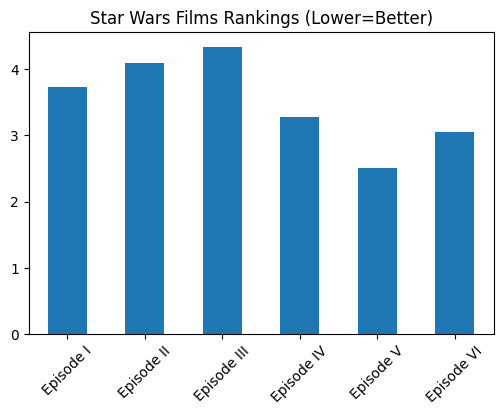

In [515]:
ranking_means.plot.bar(title="Star Wars Films Rankings (Lower=Better)", rot=45)

The graph above shows the mean ranking of each of the six Star Wars films among the fans who answered the survey.

From it we can learn that, indeed, Episode V ("The Empire Strikes Back") is the most loved Star Wars film, with Episodes VI ("Return of the Jedi") and IV ("A New Hope") at the second and third places, respectively.

We can also learn that The original trilogy (episodes IV-VI) are more loved than the prequel trilogy (episodes I-III) among these fans.

### Finding the Most Viewed Star Wars Film

In [516]:
to_episode_numbers = {
    "Seen_I" : "Episode I",
    "Seen_II" : "Episode II",
    "Seen_III" : "Episode III",
    "Seen_IV" : "Episode IV",
    "Seen_V" : "Episode V",
    "Seen_VI" : "Episode VI"
}

# Find how many of the survey's responders saw each film 
views = star_wars[star_wars.columns[3:9]].sum().rename(to_episode_numbers)
views

Episode I      673
Episode II     571
Episode III    550
Episode IV     607
Episode V      758
Episode VI     738
dtype: int64

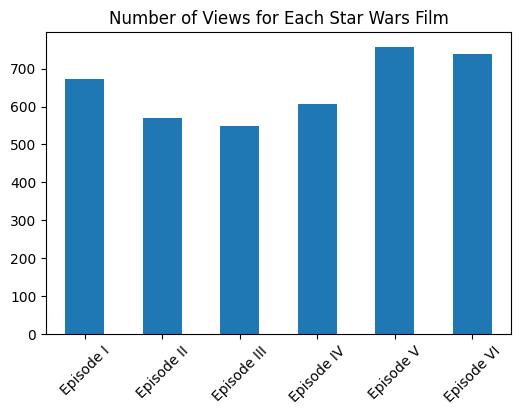

In [517]:
views.plot.bar(title="Number of Views for Each Star Wars Film", rot=45)

A few things we can learn from the graph:
* The most viewed Star Wars film is Episode V ("The Empire Strikes Back"), which correlates with it being the most loved in the saga
* We can see that in the prequel trilogy (Episodes I-III), the view count diminishes with each film. The largest drop-off is between episodes I and II, but episode III still has fewer views than the previous film. This could imply that these films weren't as good as fans expected, so after wathing one film they didn't progress to the next ones in the trilogy
* While the original trilogy is generally more loved than the prequels, more fans have seen Episode I ("The Phantom Menace") than fans who've seen Episode IV ("A New Hope"). This could be due to the fact that Episode I is more recent, and younger fans don't want to watch a several decades-old film


### Exploring the Data by Binary Segments

We know which movies the survey population as a whole has ranked the highest. Now let's examine how certain segments of the survey population responded. There are several columns that segment our data into two groups. Here are a few examples:

* `Do you consider yourself to be a fan of the Star Wars film franchise?` — `True` or `False`

* `Do you consider yourself to be a fan of the Star Trek franchise?` — `Yes` or `No`

* `Gender` — `Male` or `Female`

We can split a DataFrame into two groups based on a binary column by creating two subsets of that column.

The subsets allow us to compute the most viewed movie, the highest-ranked movie, and other statistics separately for each group.

#### Exploring the Difference Between Males and Females


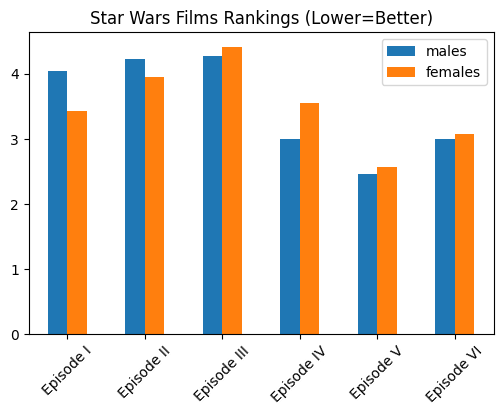

In [518]:
to_episode_numbers = {
    "ranking_of_I" : "Episode I",
    "ranking_of_II" : "Episode II",
    "ranking_of_III" : "Episode III",
    "ranking_of_IV" : "Episode IV",
    "ranking_of_V" : "Episode V",
    "ranking_of_VI" : "Episode VI",
    "Seen_I" : "Episode I",
    "Seen_II" : "Episode II",
    "Seen_III" : "Episode III",
    "Seen_IV" : "Episode IV",
    "Seen_V" : "Episode V",
    "Seen_VI" : "Episode VI"
}

# Split the dataset by gender
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

# Calculate the mean for each gender
ranking_means_gender = pd.DataFrame()
ranking_means_gender['males'] = males[star_wars.columns[9:15]].mean()\
                                .rename(to_episode_numbers)
ranking_means_gender['females'] = females[star_wars.columns[9:15]].mean()\
                                  .rename(to_episode_numbers)

# Plot a bar chart
ranking_means_gender.plot.bar(title="Star Wars Films Rankings (Lower=Better)", rot=45)


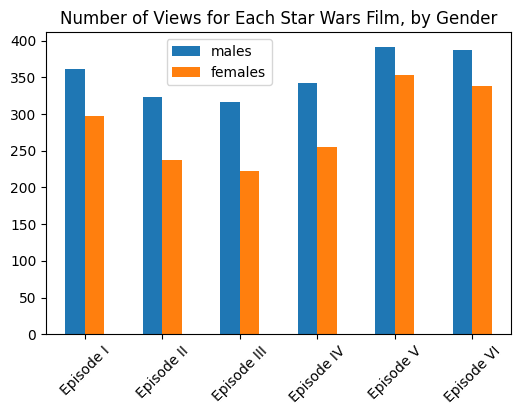

In [519]:
# Find how many males and females saw each film 
views = pd.DataFrame()
views['males'] = males[star_wars.columns[3:9]].sum().rename(to_episode_numbers)
views['females'] = females[star_wars.columns[3:9]].sum().rename(to_episode_numbers)

# Plot a bar chart
views.plot.bar(title="Number of Views for Each Star Wars Film, by Gender", rot=45).legend(bbox_to_anchor=(0.5, 1))

The Film Ranking graph shows that while both males and females tend to prefer the original trilogy over the prequels, the distinction between the trilogies is greater amongst males.
The Number of Views graph doesn't show an interesting pattern - both males' and females' number of views behave similarly, with the main difference being that more male Star Wars fans answered the survey than females.

### Exploring the Difference Between Education Levels

Next, let's see if the level of education has an effect on the ranking of the films.
How many people of each education level answered the survey?

In [520]:
star_wars['Education'].value_counts()

Some college or Associate degree    328
Bachelor degree                     321
Graduate degree                     275
High school degree                  105
Less than high school degree          7
Name: Education, dtype: int64

The creators of the survey gave 5 education levels to choose from, from `Less than high school degree` to `Graduate degree`. Only 7 of the responders have `Less than high school degree`, and that's too small a number for a significant analysis, so we'll ignore that group when doind our analysis.

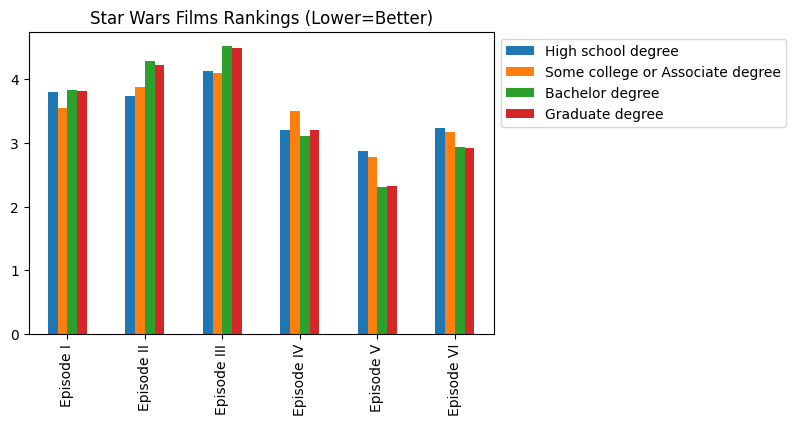

In [521]:
edu_categories = ['High school degree',
                  'Some college or Associate degree',
                  'Bachelor degree',
                  'Graduate degree']
ranking_means_by_education = star_wars.groupby('Education').mean()

ranking_means_by_education = (ranking_means_by_education[ranking_means_by_education.columns[8:15]]
                              .rename(columns=to_episode_numbers)
                              .T # Transpose to match previous charts
                             )
# Sort the columns
ranking_means_by_education = ranking_means_by_education[edu_categories]

# Plot a bar chart
ranking_means_by_education.plot.bar(title="Star Wars Films Rankings (Lower=Better)").legend(bbox_to_anchor=(1, 1))


There isn't a great difference in preference among the various groups. We can see that people with a batchelor degree and above tend to favour episodes V and VI more than episodes II and III, relative to people without a degree.
This can be because the original trilogy provides a more cerebral experience, in contrast with the prequels' childish storyline and characters, or simply because the "people with a degree" group is generally older, and its members tend to favour films they saw during the childhood or adolescense. 

### Exploring Trekkies' Rankings

Do trekkies (Star Trek fans) rank the films differently? Let's check.

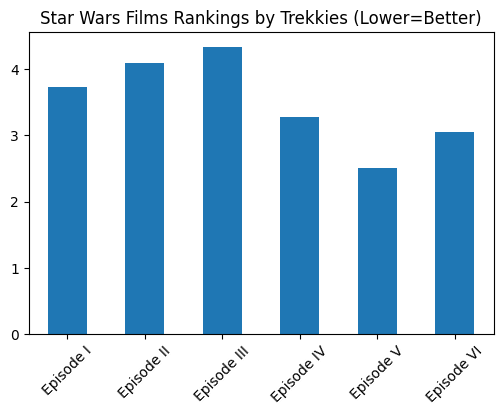

In [522]:
trek_fans = star_wars[star_wars['Do you consider yourself to be a fan of the Star Trek franchise?'] == 'Yes']

trek_fans_ranking_means = trek_fans[trek_fans.columns[9:15]].mean()

to_episode_numbers = {
    "ranking_of_I" : "Episode I",
    "ranking_of_II" : "Episode II",
    "ranking_of_III" : "Episode III",
    "ranking_of_IV" : "Episode IV",
    "ranking_of_V" : "Episode V",
    "ranking_of_VI" : "Episode VI"
}
trek_fans_ranking_means.rename(to_episode_numbers, inplace=True)

ranking_means.plot.bar(title="Star Wars Films Rankings by Trekkies (Lower=Better)", rot=45)

Well, it seems that Trekkies' rankings are pretty much identical to those of the general population.

### Exploring the Star Wars/Trek Divide

As we're already looking at Trekkies, let's explore this question.
It is a truth universally acknowledged in pop culture, that you can either be a Trekkie or a Star Wars fan, but not both. Let's look at the survey data and see if it conforms with this hypothesis.

In [523]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts(dropna=False)

True     552
NaN      350
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

Interestingly, out of the 1,186 people who filled the survey, only 552 (47%) claim to be fans of the film series. Are the rest fans of the franchise but no the films, or are they simply not fans? If they're not Star Wars fans, why fill the survey?


In [524]:
star_wars['Do you consider yourself to be a fan of the Star Trek franchise?'].value_counts(dropna=False)

No     641
Yes    427
NaN    118
Name: Do you consider yourself to be a fan of the Star Trek franchise?, dtype: int64

Let's first convert the answers to True/False:

In [525]:
star_wars['Do you consider yourself to be a fan of the Star Trek franchise?'] = \
    star_wars['Do you consider yourself to be a fan of the Star Trek franchise?'].map(lambda x : x == 'Yes', na_action='ignore')

star_wars['Do you consider yourself to be a fan of the Star Trek franchise?'].value_counts(dropna=False)

False    641
True     427
NaN      118
Name: Do you consider yourself to be a fan of the Star Trek franchise?, dtype: int64

Now let's see if there's a correlation between fans of the Star Wars film series and fans of the Star Trek franchise. 
To do that we'll group the relevant columns in the dataframe and see how many of the people who replied to the survey are fans of both fandoms, neither fandom or just one of them.

In [526]:
star_wars_trek = star_wars[['Do you consider yourself to be a fan of the Star Wars film franchise?',
                            'Do you consider yourself to be a fan of the Star Trek franchise?']].copy()
simple_col_names = {'Do you consider yourself to be a fan of the Star Trek franchise?': 'trek_fans',
                   'Do you consider yourself to be a fan of the Star Wars film franchise?' : 'wars_fans'}

star_wars_trek.rename(columns=simple_col_names, inplace=True)
# Replacing NaN with another value, to allow groupby to group it as well
star_wars_trek.fillna('No Answer', inplace=True)
grouped_counts = star_wars_trek.groupby('wars_fans')['trek_fans'].value_counts().unstack()

In [527]:
grouped_counts

trek_fans,False,True,No Answer
wars_fans,,,
False,238,45,1
True,175,370,7
No Answer,228,12,110


Now, let's plot the relations between the various groups:

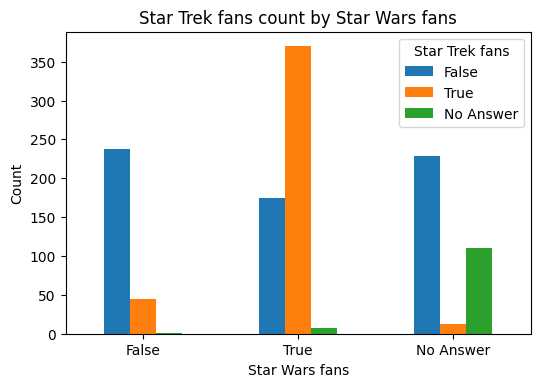

In [528]:
grouped_counts.plot.bar()
plt.xlabel("Star Wars fans")
plt.ylabel("Count")
plt.title("Star Trek fans count by Star Wars fans")
plt.xticks(rotation=0)
plt.legend(title='Star Trek fans')

plt.show()

Interestingly, the vast majoroity of Star Trek fans who answered this survey are also fans of Star Wars. That may not be too surprising, since the survey was aimed at Star Wars fans, but it certainly shows that these groups are far from being mutually exclusive.

### Exploring Favourite Characters

The respondents were asked whether or not they liked 14 of the main characters in the saga. Let's see which character is the favourite (most likes), most hated (most dislikes) and most controversial (split between likes and dislikes).
Let's see what are the possible values:

In [529]:
star_wars[star_wars.columns[15]].value_counts(dropna=False)

Very favorably                                 610
NaN                                            357
Somewhat favorably                             151
Neither favorably nor unfavorably (neutral)     44
Unfamiliar (N/A)                                15
Somewhat unfavorably                             8
Very unfavorably                                 1
Name: favour_han_solo, dtype: int64

For our purposes, we only care is the respondent likes, dislikes or is neutral to the character. So we'll group `Very favorably` and `Somewhat favorably` together as `Yes`, `Neither favorably nor unfavorably (neutral)`, `Unfamiliar (N/A)` and `NaN` as `Neutral` and `Somewhat unfavorably` and `Very unfavorably` as `No`.

In [530]:
favour = {
    'Very favorably' : 'Yes',
    'Somewhat favorably' : 'Yes',
    'Neither favorably nor unfavorably (neutral)' : 'Neutral',
    'Unfamiliar (N/A)' : 'Neutral',
    np.nan : 'Neutral',
    'Somewhat unfavorably' : 'No',
    'Very unfavorably' : 'No'
}

characters_likes = star_wars[star_wars.columns[15:29]].copy()
characters_likes.replace(favour, inplace=True)


In [531]:
# Aggregate by counts of each value and transpose
characters_likes = characters_likes.apply(lambda x: x.value_counts()).T
# Change indices to character names

to_names = {
    "favour_han_solo" : "Han Solo",
    "favour_luke_skywalker" : "Luke Skywalker",
    "favour_princess_leia_organa" : "Princess Leia Organa",
    "favour_anakin_skywalker" : "Anakin Skywalker",
    "favour_obi_wan_kenobi" : "Obi Wan Kenobi",
    "favour_emperor_palpatine" : "Emperor Palpatine",
    "favour_darth_vader" : "Darth Vader",
    "favour_lando_calrissian" : " Lando Calrissian",
    "favour_boba_fett" : "Boba Fett",
    "favour_c-3p0" : "C-3PO",
    "favour_r2_d2" : "R2 D2",
    "favour_jar_jar_binks" : "Jar Jar Binks",
    "favour_padme_amidala" : "Padme Amidala",
    "favour_yoda" : "Yoda"
    
}
characters_likes.rename(index=to_names, inplace=True)
characters_likes

,Neutral,No,Yes
Han Solo,416,9,761
Luke Skywalker,399,16,771
Princess Leia Organa,411,18,757
Anakin Skywalker,550,122,514
Obi Wan Kenobi,421,15,750
Emperor Palpatine,741,192,253
Darth Vader,454,251,481
Lando Calrissian,750,71,365
Boba Fett,754,141,291
C-3PO,453,30,703


#### Most Liked

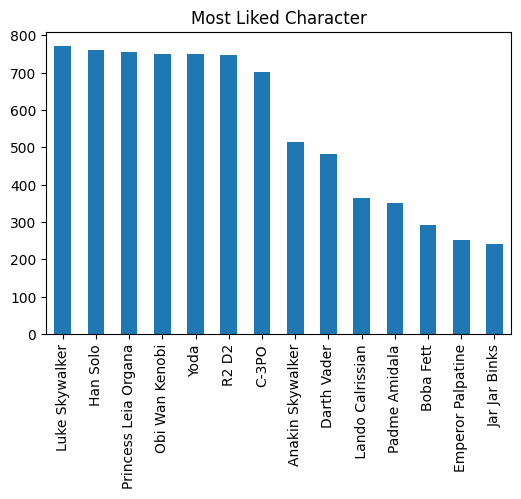

In [532]:
characters_likes['Yes'].sort_values(ascending=False).plot.bar(title="Most Liked Character")


Luke Skywalker is the favourite character, by a hair over his sister and his friend/brother-in-law.

#### Most Disliked

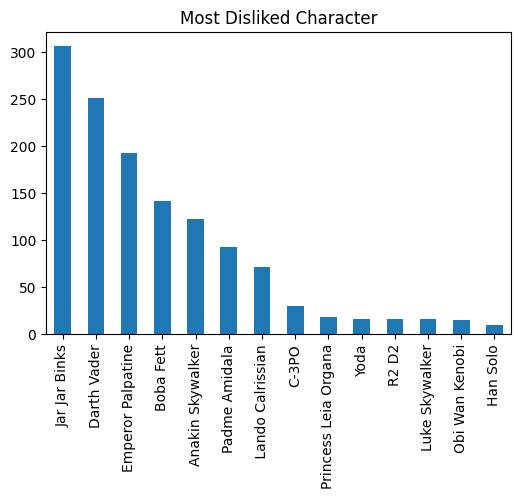

In [533]:
characters_likes['No'].sort_values(ascending=False).plot.bar(title="Most Disliked Character")

Jar Jar Binks is by far the most disliked character amongst the responders, surpassing two Sith lords.

#### Most Controversial character

To find the most controversial character, let's find the likes/dislikes ratio for each character:

In [534]:
characters_likes['likes_dislikes_ratio'] = characters_likes['Yes'] / characters_likes['No']
characters_likes['likes_dislikes_ratio']

Han Solo                84.555556
Luke Skywalker          48.187500
Princess Leia Organa    42.055556
Anakin Skywalker         4.213115
Obi Wan Kenobi          50.000000
Emperor Palpatine        1.317708
Darth Vader              1.916335
 Lando Calrissian        5.140845
Boba Fett                2.063830
C-3PO                   23.433333
R2 D2                   46.687500
Jar Jar Binks            0.790850
Padme Amidala            3.815217
Yoda                    46.812500
Name: likes_dislikes_ratio, dtype: float64

Now, to find the character that's most split between likes and dislikes, we'll find the inverse of each ratio that's bigger than 1, then look for the one that's closest to 1:

In [535]:
characters_likes['likes_dislikes_ratio'] = characters_likes['likes_dislikes_ratio'].apply(lambda x : (1 / x) if x > 1 else x)
characters_likes['likes_dislikes_ratio']

Han Solo                0.011827
Luke Skywalker          0.020752
Princess Leia Organa    0.023778
Anakin Skywalker        0.237354
Obi Wan Kenobi          0.020000
Emperor Palpatine       0.758893
Darth Vader             0.521830
 Lando Calrissian       0.194521
Boba Fett               0.484536
C-3PO                   0.042674
R2 D2                   0.021419
Jar Jar Binks           0.790850
Padme Amidala           0.262108
Yoda                    0.021362
Name: likes_dislikes_ratio, dtype: float64

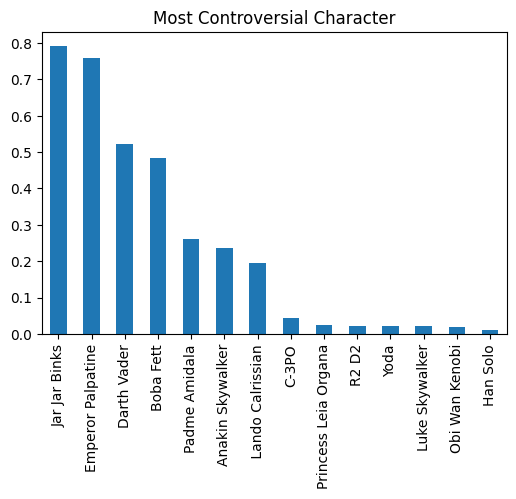

In [536]:
characters_likes['likes_dislikes_ratio'].sort_values(ascending=False).plot.bar(title="Most Controversial Character")


Interestingly enough, the controversial characters bar chart is rather similar to the disliked characters one, which means that even disliked characters have quite a lot of fans who like them. 

## Conclusion

The question raised by the surveyors is "does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?", and we can answer that with a resounding "Yes!".

The general population agrees with this, and we couldn't find a segment of the responders that didnt' agree with that.

We also found that the original trilogy is, by and large, more loved than the prequels trilogy. That, too, spans many sub-segments of the responders.

The original trilogy has had more views than the prequels, which is consistent with it being more loved among the fans.

We also looked at the Star Wars/Star Trek divide, and found that it's largely a myth. Many Star Wars fans are also Trekkies, and vice versa.

Lastly, we looked at the favourable characters and found that Luke Skywalker, Princess Leia and Han Solo are at the top 3 places. The most disliked characters are Jar Jar Binks, Darth Vader and Emperor Palpatine.
Binks, Vader and The Emperor are also the most controversial characters, which means that the number of likes they received is close to the number of dislikes, so no Star Wars character is truly hated.